In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Needed Columns for the Hypothesis testing
data_needed = ["Order Date", "Purchase Price Per Unit", "Quantity", "Category", "Survey ResponseID", "Shipping Address State", "ppt", "tmin", "tmax", "tavg"]

transactions_temp = pd.read_csv("./Data/data_combined.csv", usecols=data_needed)
transactions_temp["Order Date"] = pd.to_datetime(transactions_temp["Order Date"]) # Formating Order date back to Datetime dtype, in read_csv you cant set column to datetime so need to do manually

#### Calculating total amount of each transactions (Quantity * Unit price) 

In [3]:
transactions_temp["Revenue"] = transactions_temp["Purchase Price Per Unit"] * transactions_temp["Quantity"]

# TBD with Prof
### Filtering out States where we dont have Temperature information Alaska, Hawaii, Puerto Rico?, District of Columbia 

In [4]:
transactions_temp = transactions_temp[~transactions_temp["Shipping Address State"].isin(["AK", "HI", "PR", "DC", "I did not reside in the United States"])] # Remove Shipping addresses without temperature information

transactions_temp  = transactions_temp[(transactions_temp['Order Date'] < '2024-01-01')] # Remove transactions from 2024 (we only have one transaction + temperature might be inaccurate)

#### Creating subset for fashion, or Grocers

Subcategories are selected based on the inital categories in the transaction dataset and the search results displayed on amazon.com

In [5]:
Fashion = [
    "ACCESSORY", "ADULT_COSTUME", "APPAREL", "APPAREL_BELT", "APPAREL_GLOVES",
    "APPAREL_HEAD_NECK_COVERING", "APPAREL_PIN", "APPENDAGE_WARMER", "APRON",
    "ARM_SLEEVE", "Apparel", "BABY_JUMPER_WALKER", "BELTS", "BLAZER",
    "BLUE_LIGHT_BLOCKING_EYEGLASSES", "BODYSTOCKING", "BOOT", "BRA", "BRACELET",
    "BRA_UNDERWEAR_SET", "CHOLI", "COAT", "COORDINATED_OUTFIT", "CORRECTIVE_EYEGLASSES",
    "CORSET", "DRESS", "DUPATTA", "EARMUFF", "EARRING", "ETHNIC_WEAR",
    "FASHIONEARRING", "FASHIONNECKLACEBRACELETANKLET", "FASHIONOTHER", "FASHIONRING",
    "FASHION_JEWELRY", "FINEEARRING", "FINENECKLACEBRACELETANKLET", "FINERING",
    "FOOTWEAR", "GUILD_APPAREL", "GUILD_JEWELRY", "GUILD_SHOES", "HAT", "HOSIERY",
    "JEWELRY", "JEWELRY_SET", "KIMONO", "KURTA", "LEG_SLEEVE", "LEOTARD",
    "MOISTURIZING_SOCK_GLOVE", "NECKLACE", "NECKTIE", "NIGHTGOWN_NIGHTSHIRT",
    "ORCA_SHIRT", "OUTERWEAR", "OVERALLS", "PAJAMAS", "PANTS", "PIERCING_JEWELRY",
    "ROBE", "SANDAL", "SAREE", "SHIRT", "SHOES", "SHORTS", "SKIRT", "SLEEPWEAR",
    "SLIPPER", "SNOWSHOE", "SNOWSUIT", "SNOW_PANT", "SOCK", "SOCKSHOSIERY", "SUIT",
    "SUNGLASSES", "SUSPENDER", "SWEATER", "SWEATSHIRT", "SWIMWEAR", "SWIM_CAP",
    "TIGHTS", "TRACK_SUIT", "UNDERPANTS", "UNDERWEAR", "UNDERGARMENT_SLIP",
    "UNDERGARMENT_THIGH_SLIMMER", "UNION_SUIT", "VEST", "WATCH", "WATCHES", "WATCH_BAND"
]


Groceries = [
   "ALCOHOLIC_BEVERAGE", "BABY_FOOD", "BABY_FORMULA", "BAKING_CHOCOLATE", "BEER",
   "BEVERAGE", "BREAD", "BREAKFAST_CEREAL", "CAKE", "CANDY", "CEREAL",
   "CHOCOLATE_CANDY", "COFFEE", "CONDIMENT", "COOKIE", "CRACKER", "CULINARY_SALT",
   "DAIRY_BASED_BUTTER", "DAIRY_BASED_CHEESE", "DAIRY_BASED_CREAM",
   "DAIRY_BASED_DRINK", "DAIRY_BASED_ICE_CREAM", "DAIRY_BASED_PUDDING",
   "DAIRY_BASED_YOGURT", "DONUT", "DRINK_FLAVORED", "EDIBLE_OIL_VEGETABLE",
   "FLOUR", "FRUIT", "FRUIT_SNACK", "FUDGE", "GOURMET_FOOD", "GROCERY", "Grocery",
   "HEALTH_FOOD", "HONEY", "JERKY", "JUICE_AND_JUICE_DRINK", "LEGUME",
   "MEAL_REPLACEMENT_BEVERAGE", "MEAT_ALTERNATIVE", "MILK_SUBSTITUTE",
   "NON_DAIRY_CHEESE", "NON_DAIRY_CREAM", "NON_DAIRY_ICE_CREAM",
   "NON_DAIRY_PUDDING", "NON_DAIRY_YOGURT", "NOODLE", "NUTS", "NUT_AND_SEED",
   "NUT_BUTTER", "OLIVE", "PACKAGED_SOUP_AND_STEW", "PASTRY", "POPCORN",
   "PRETZEL", "PROTEIN_DRINK", "PROTEIN_SUPPLEMENT_POWDER", "PUFFED_SNACK",
   "RICE_MIX", "RICE_WINE", "SALAD_DRESSING", "SEAFOOD", "SEASONING",
   "SNACK_CHIP_AND_CRISP", "SNACK_FOOD", "SNACK_FOOD_BAR", "SNACK_MIX",
   "SPORTS_DRINK", "SUGAR", "SUGAR_CANDY", "SUGAR_SUBSTITUTE", "SYRUP", "TEA",
   "TOFU", "VEGETABLE", "VEGETARIAN_EGG_SUBSTITUTE", "WATER"
]

In [6]:
mask_fashion = transactions_temp["Category"].isin(Fashion)
Fashion_transactions = transactions_temp[mask_fashion]
Fashion_transactions = Fashion_transactions.sort_values(["Order Date"]).copy() # .copy() to create new dataframe in memory and not a pd view


mask_groceries = transactions_temp["Category"].isin(Groceries)
Grocerie_transactions = transactions_temp[mask_groceries]
Grocerie_transactions = Grocerie_transactions.sort_values(["Order Date"]).copy()

In [7]:
"""#Fashion_transactions.groupby("Shipping Address State").agg({"Shipping Address State": "count"}).sort_values("Shipping Address State", ascending= False)

print(Fashion_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))


print(Grocerie_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))"""

'#Fashion_transactions.groupby("Shipping Address State").agg({"Shipping Address State": "count"}).sort_values("Shipping Address State", ascending= False)\n\nprint(Fashion_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))\n\n\nprint(Grocerie_transactions.groupby("Shipping Address State")["Shipping Address State"].count().sort_values(ascending=False).head(5))'

### Grouping Transactions together on Date and State
Goal is to only have one entry for each date and state not multiple transactions for a single date

In [8]:
Fashion_transactions = Fashion_transactions.sort_values("Order Date", ascending=True)

Fashion_transactions_grouped = Fashion_transactions.groupby([ "Order Date", "Shipping Address State"]).agg({"Revenue": "sum", "tavg":"first", "tmin":"first", "tmax": "first", "ppt": "first"})

Fashion_transactions_grouped.reset_index(["Order Date", "Shipping Address State"], inplace=True)

In [9]:
Grocerie_transactions = Grocerie_transactions.sort_values("Order Date", ascending=True)

Grocerie_transactions_grouped = Grocerie_transactions.groupby([ "Order Date", "Shipping Address State"]).agg({"Revenue": "sum", "tavg":"first", "tmin":"first", "tmax": "first", "ppt": "first"})

Grocerie_transactions_grouped.reset_index(["Order Date", "Shipping Address State"], inplace=True)

# Granger Causality test for Fashion and Groceries

https://www.machinelearningplus.com/time-series/granger-causality-test-in-python/
We test if there is a significant correlation in all use states for average Temperature and Revenue of the Category

In [10]:
## Fashion
print(Fashion_transactions_grouped.head())

## Groceries
print(Grocerie_transactions_grouped.head())


  Order Date Shipping Address State  Revenue    tavg    tmin    tmax    ppt
0 2018-01-01                     AL    22.84  -2.133  -7.569   3.303  1.602
1 2018-01-01                     CA    54.68  10.109   3.878  16.340  0.003
2 2018-01-01                     CO    17.99  -6.905 -13.028  -0.782  0.007
3 2018-01-01                     FL     9.23  12.016   5.538  18.493  2.699
4 2018-01-01                     IN     7.99 -15.906 -21.087 -10.725  0.187
  Order Date Shipping Address State  Revenue    tavg    tmin    tmax    ppt
0 2018-01-01                     CA    80.36  10.109   3.878  16.340  0.003
1 2018-01-01                     FL    55.75  12.016   5.538  18.493  2.699
2 2018-01-01                     IL    10.57 -18.343 -23.779 -12.906  0.001
3 2018-01-01                     IN     7.98 -15.906 -21.087 -10.725  0.187
4 2018-01-01                     KY     9.68 -11.014 -15.211  -6.816  0.003


# Grangers Causation Matrix for Revenue

### Grangers Causation Matrix for Fashion 

In [11]:
from utils.custom_granger_test import Granger_Causality_test_per_state # Import custom Granger test function

In [12]:
# List of states
states_list = Fashion_transactions_grouped["Shipping Address State"].unique()

# Creating Filtered dataframe for Granger test
df_granger_fashion = Fashion_transactions_grouped[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_fashion = df_granger_fashion.set_index("Order Date")


In [13]:
Granger_matrix_fashion_30 = Granger_Causality_test_per_state(df_granger_fashion, states_list, sma=True, log= False, rolling_value=30)

Granger_matrix_fashion_7 = Granger_Causality_test_per_state(df_granger_fashion, states_list, sma=True, log= False, rolling_value=7)

State with ValueError:WY


### Grangers Causation Matrix for Groceries

In [14]:
# List of states
states_list = Grocerie_transactions_grouped["Shipping Address State"].unique()

# Creating Filtered dataframe
df_granger_groceries = Grocerie_transactions_grouped[["Order Date", "Revenue", "tavg", "Shipping Address State"]]
df_granger_groceries = df_granger_groceries.set_index("Order Date")

#df_granger_groceries= df_granger_groceries.dropna()

In [15]:
Granger_matrix_groceries_30 = Granger_Causality_test_per_state(df_granger_groceries, states_list, sma=True, log= False,rolling_value=30)

State with ValueError:WY
State with ValueError:ND


## Analysising causes for revenue growth for Fashion

### Calculating the number of users per state per year
To analyse the revenue growth deeper we want to see if the user count for each state grew as well

In [16]:
Fashion_transactions_users = Fashion_transactions
Fashion_transactions_users["year"] = Fashion_transactions["Order Date"].dt.year
Fashion_transactions_users = Fashion_transactions_users.groupby(["Shipping Address State", "year"]).agg({"Survey ResponseID" : pd.Series.nunique})
Fashion_transactions_users.reset_index(["Shipping Address State", "year"], inplace=True)

## Clusterin States into Regions

In [17]:
# Region information: https://education.nationalgeographic.org/resource/united-states-regions/
west = ["CA","OR","WA","ID","MT","WY","CO","AK","HI"]
midwest = ["IL","IN","MI","OH","WI","IA","KS","MN","MO","NE","ND","SD"]
northeast = ["CT","ME","MA","NH","RI","VT","NJ","NY","PA"]
southwest = ["AZ","NM","OK","TX","NV","UT"]
southeast = ["AL","AR","FL","GA","KY","LA","MS","NC","SC","TN","VA","WV","DE","MD","DC"]

## Temperatures of each region

In [18]:


fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

for state in west:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[0].plot(state_data["Order Date"],
             state_data["tavg"],
             label = state)
axes[0].set_title("Western States")

for state in midwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[1].plot(state_data["Order Date"],
             state_data["tavg"],
             label = state)
axes[1].set_title("Midwestern States")

for state in northeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[2].plot(state_data["Order Date"],
             state_data["tavg"],
             label = state)
axes[2].set_title("Northeastern States")

for state in southwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[3].plot(state_data["Order Date"],
             state_data["tavg"],
             label = state)
axes[3].set_title("Southwestern States")

for state in southeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[4].plot(state_data["Order Date"],
             state_data["tavg"],
             label = state)
axes[4].set_title("Southeastern States")

# Remove the extra subplot
fig.delaxes(axes[5])

# Add legends and adjust layout
for ax in axes[:-1]:  # exclude the removed subplot
    ax.legend(title='State')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Rain per region

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

for state in west:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[0].plot(state_data["Order Date"],
             state_data["ppt"],
             label = state)
axes[0].set_title("Western States")

for state in midwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[1].plot(state_data["Order Date"],
             state_data["ppt"],
             label = state)
axes[1].set_title("Midwestern States")

for state in northeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[2].plot(state_data["Order Date"],
             state_data["ppt"],
             label = state)
axes[2].set_title("Northeastern States")

for state in southwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[3].plot(state_data["Order Date"],
             state_data["ppt"],
             label = state)
axes[3].set_title("Southwestern States")

for state in southeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
    axes[4].plot(state_data["Order Date"],
             state_data["ppt"],
             label = state)
axes[4].set_title("Southeastern States")

# Remove the extra subplot
fig.delaxes(axes[5])

# Add legends and adjust layout
for ax in axes[:-1]:  # exclude the removed subplot
    ax.legend(title='State')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Revenue and User development

In [20]:
west = ["CA","OR","WA","ID","MT","WY","CO","AK","HI"]
midwest = ["IL","IN","MI","OH","WI","IA","KS","MN","MO","NE","ND","SD"]
northeast = ["CT","ME","MA","NH","RI","VT","NJ","NY","PA"]
southwest = ["AZ","NM","OK","TX","NV","UT"]
southeast = ["AL","AR","FL","GA","KY","LA","MS","NC","SC","TN","VA","WV","DE","MD","DC"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


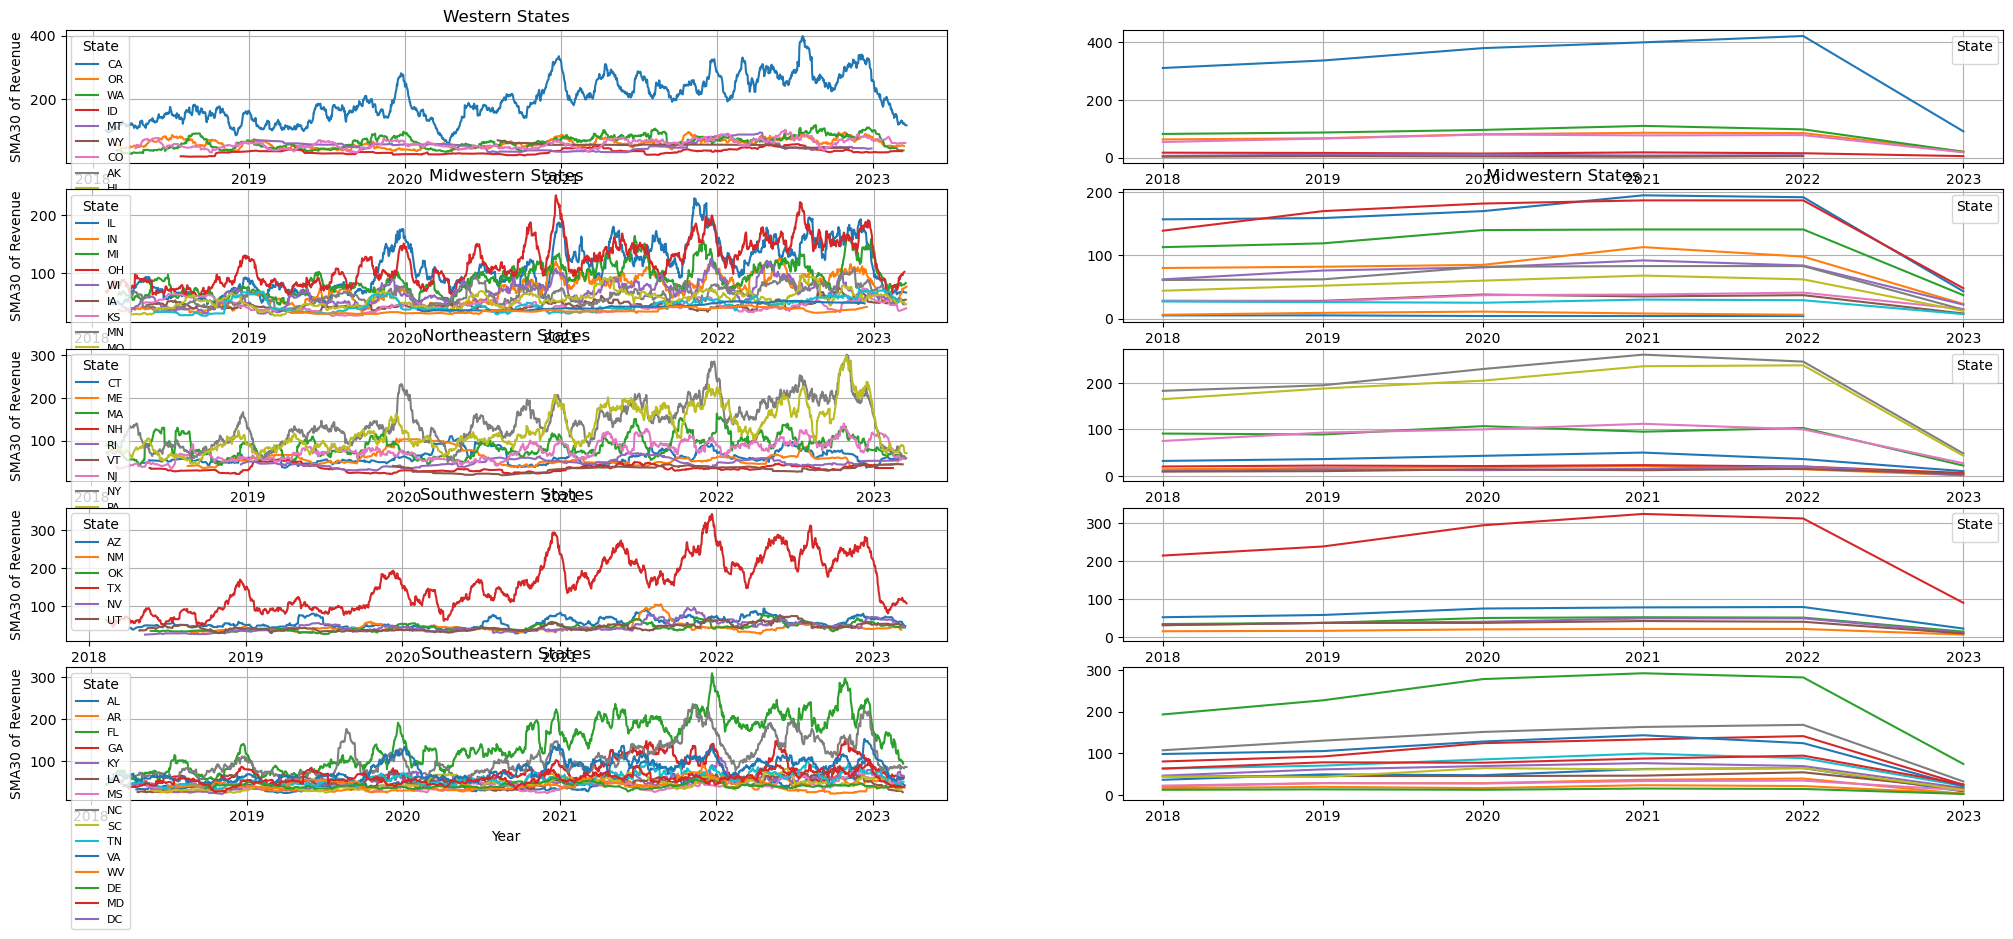

In [21]:
days = 30

fig, axes = plt.subplots(5, 2, figsize=(25, 10))
axes = axes.flatten()

## Western States
for state in west:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()

    state_data["SMA"] = state_data["Revenue"].rolling(days).mean()
    state_data = state_data.iloc[days-1:,:]

    axes[0].plot(state_data["Order Date"],
             state_data["SMA"],
             label = state)
axes[0].set_title("Western States")
axes[0].set_ylabel("SMA30 of Revenue")
axes[0].set_xlabel("Year")
#axes[0].legend(title='State')

    
for state in west:

        Fashion_transactions_users_filtered = Fashion_transactions_users[Fashion_transactions_users['Shipping Address State'] == state]

        axes[1].plot(Fashion_transactions_users_filtered["year"], 
                Fashion_transactions_users_filtered["Survey ResponseID"])
#axes[1].legend(title='State')

## Midwestern States
for state in midwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()

    state_data["SMA"] = state_data["Revenue"].rolling(days).mean()
    state_data = state_data.iloc[days-1:,:]

    axes[2].plot(state_data["Order Date"],
             state_data["SMA"],
             label = state)
axes[2].set_title("Midwestern States")
axes[2].set_ylabel("SMA30 of Revenue")
axes[2].set_xlabel("Year")
#axes[2].legend(title='State')

    
for state in midwest:

        Fashion_transactions_users_filtered = Fashion_transactions_users[Fashion_transactions_users['Shipping Address State'] == state]

        axes[3].plot(Fashion_transactions_users_filtered["year"], 
                Fashion_transactions_users_filtered["Survey ResponseID"])
axes[3].set_title("Midwestern States")
#axes[3].legend(title='State')


## Northestern States

for state in northeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()

    state_data["SMA"] = state_data["Revenue"].rolling(days).mean()
    state_data = state_data.iloc[days-1:,:]

    axes[4].plot(state_data["Order Date"],
             state_data["SMA"],
             label = state)
axes[4].set_title("Northeastern States")
axes[4].set_ylabel("SMA30 of Revenue")
axes[4].set_xlabel("Year")
#axes[4].legend(title='State')

    
for state in northeast:

        Fashion_transactions_users_filtered = Fashion_transactions_users[Fashion_transactions_users['Shipping Address State'] == state]

        axes[5].plot(Fashion_transactions_users_filtered["year"], 
                Fashion_transactions_users_filtered["Survey ResponseID"])
#axes[5].legend(title='State')


### Southwestern States
for state in southwest:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()

    state_data["SMA"] = state_data["Revenue"].rolling(days).mean()
    state_data = state_data.iloc[days-1:,:]

    axes[6].plot(state_data["Order Date"],
             state_data["SMA"],
             label = state)
axes[6].set_title("Southwestern States")
axes[6].set_ylabel("SMA30 of Revenue")
axes[6].set_xlabel("Year")
#axes[6].legend(title='State')

    
for state in southwest:

        Fashion_transactions_users_filtered = Fashion_transactions_users[Fashion_transactions_users['Shipping Address State'] == state]

        axes[7].plot(Fashion_transactions_users_filtered["year"], 
                Fashion_transactions_users_filtered["Survey ResponseID"])



### Southeastern States
for state in southeast:
    state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()

    state_data["SMA"] = state_data["Revenue"].rolling(days).mean()
    state_data = state_data.iloc[days-1:,:]

    axes[8].plot(state_data["Order Date"],
             state_data["SMA"],
             label = state)
axes[8].set_title("Southeastern States")
axes[8].set_ylabel("SMA30 of Revenue")
axes[8].set_xlabel("Year")
#axes[8].legend(title='State')

    
for state in southeast:

        Fashion_transactions_users_filtered = Fashion_transactions_users[Fashion_transactions_users['Shipping Address State'] == state]

        axes[9].plot(Fashion_transactions_users_filtered["year"], 
                Fashion_transactions_users_filtered["Survey ResponseID"])



# Add legends and adjust layout
for ax in axes[:-1]:  # exclude the removed subplot
    ax.legend(title='State', fontsize=8)
    ax.grid(True)

#plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.show()

In [22]:
import plotly.express as px

Southeast_df = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'].isin(southeast)]

fig = px.line(Southeast_df, x='Order Date', y='Revenue', color='Shipping Address State',
              title='Revenue by State Over Time',
              hover_data=['Shipping Address State', 'Revenue'])
fig.show()

In [23]:
## Adding yearly user information to Fashion Transactions
Fashion_transactions_grouped["year"] = Fashion_transactions_grouped["Order Date"].dt.year

Fashion_transactions_adjusted = Fashion_transactions_grouped.merge(Fashion_transactions_users, on=["Shipping Address State", "year"])

In [24]:
Fashion_transactions_adjusted["Revenue_user"] = Fashion_transactions_adjusted["Revenue"] / Fashion_transactions_adjusted["Survey ResponseID"]

In [25]:
state = "CA"

# Data processing
state_data = Fashion_transactions_grouped[Fashion_transactions_grouped['Shipping Address State'] == state].copy()
state_data["tavg"] = state_data["tavg"].rolling(days).mean()
state_data["SMA"] = state_data["Revenue"].rolling(days).mean().shift(30)
state_data = state_data.iloc[days-1:,:]

# Plotting
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)


ax1.plot(state_data["Order Date"],
            state_data["SMA"],
            color="tab:red")

# Second line
ax2 = ax1.twinx()
ax2.plot(state_data["Order Date"],
         state_data["tavg"],
         color="tab:blue")


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Revenue/Users in that year', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Temperature", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title(f"Visualizing Leading Indicator Phenomenon for Temperature on Revenue for {state}", fontsize=22)
fig.tight_layout()
plt.show()

In [26]:
import plotly.express as px

def create_interactive_plot_express(Fashion_transactions_grouped, days=30):
    # Process data for all states
    Fashion_transactions_grouped = Fashion_transactions_grouped.copy()
    Fashion_transactions_grouped["tavg"] = Fashion_transactions_grouped.groupby('Shipping Address State')["tavg"].transform(lambda x: x.rolling(days).mean())
    Fashion_transactions_grouped["SMA"] = Fashion_transactions_grouped.groupby('Shipping Address State')["Revenue"].transform(lambda x: x.rolling(days).mean().shift(30))
    Fashion_transactions_grouped = Fashion_transactions_grouped.iloc[days-1:,:]

    # Create figure
    fig = px.line(Fashion_transactions_grouped, 
                  x="Order Date", 
                  y=["SMA", "tavg"],
                  color="Shipping Address State",
                  title="Temperature and Revenue Trends by State",
                  labels={"Order Date": "Time",
                         "SMA": "Revenue SMA",
                         "tavg": "Temperature"},
                  width=1200,
                  height=600)

    fig.update_layout(
        title_x=0.5,
        title_font_size=22,
        hovermode='x unified'
    )

    return fig

# Create and show the plot
fig = create_interactive_plot_express(Fashion_transactions_grouped)
fig.show()